<a href="https://colab.research.google.com/github/Devarsh-Patel/CECS-456-Machine-Learning-Project/blob/main/animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Kaggle

In [1]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Get dataset from an account. 

In [2]:
! kaggle datasets download -d alessiocorrado99/animals10

 99% 578M/586M [00:04<00:00, 137MB/s]
100% 586M/586M [00:04<00:00, 137MB/s]


Unzipping all the dataset at Colab

In [ ]:
! unzip animals10.zip

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense, Flatten
from keras.models import Model 
from keras_preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.layers import Dropout
import keras

Gettting all the images in one file

In [5]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=True,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_datas = train_datagen.flow_from_directory(directory="/content/raw-img",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                                subset='training'
                                                )

validation_datas = test_datagen.flow_from_directory(directory="/content/raw-img",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               subset='validation')

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [6]:
train_datas.class_indices

{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


train


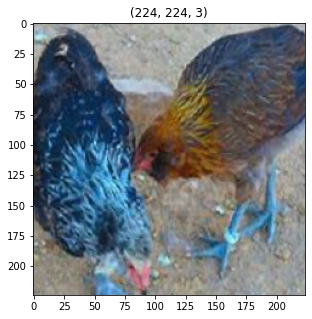

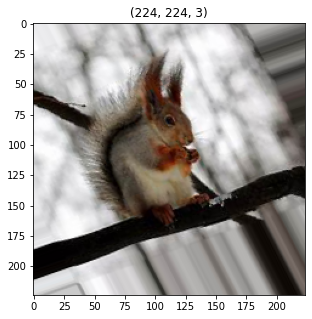

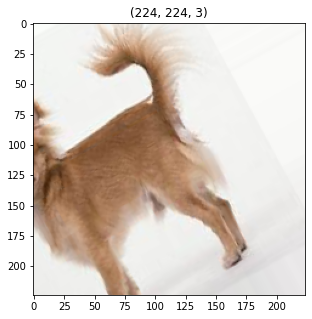

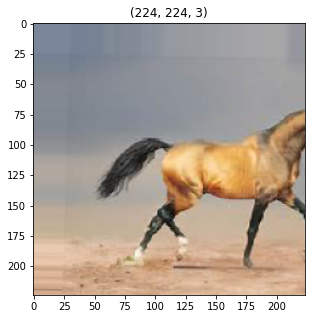

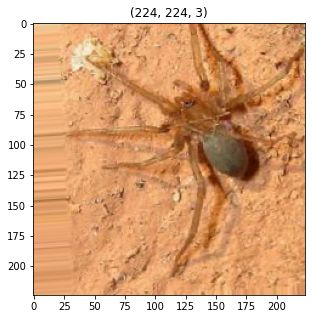

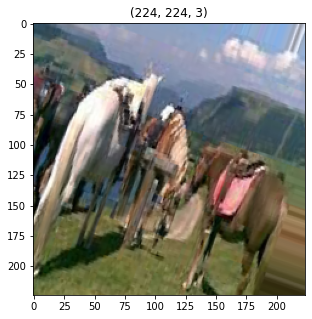

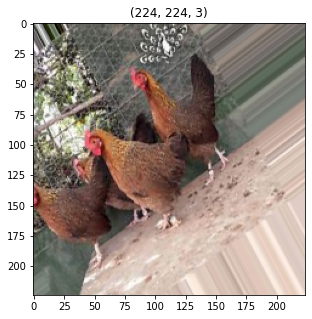

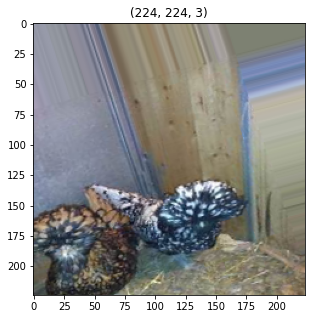

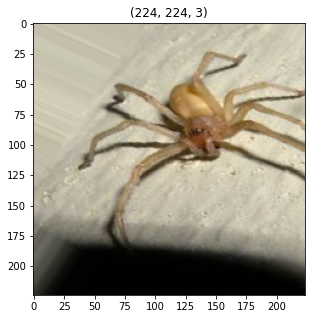

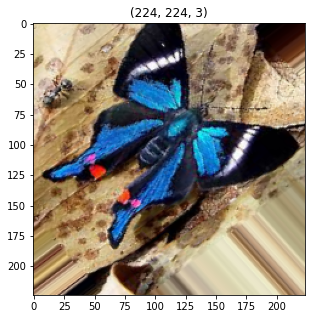

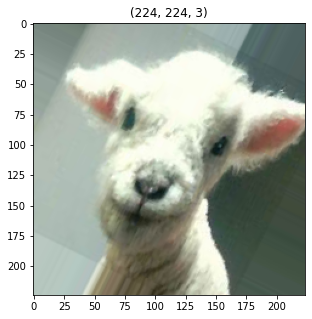

Validation


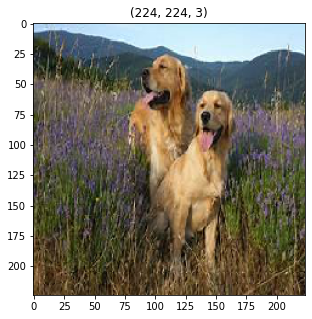

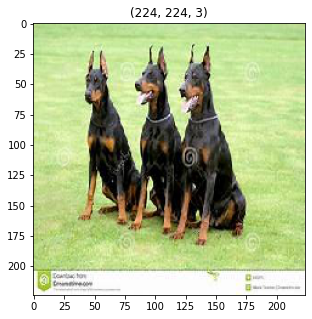

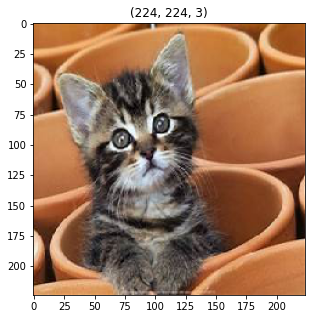

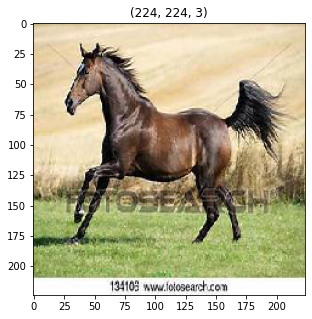

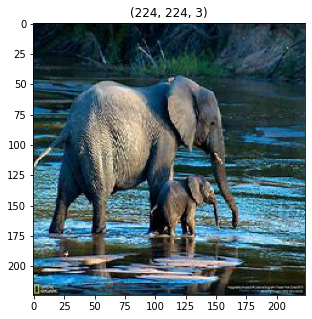

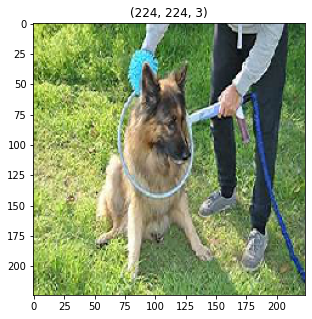

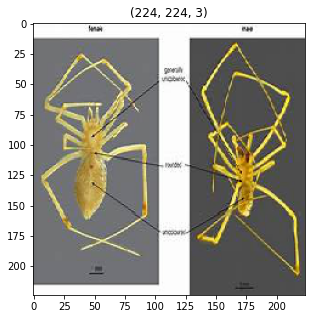

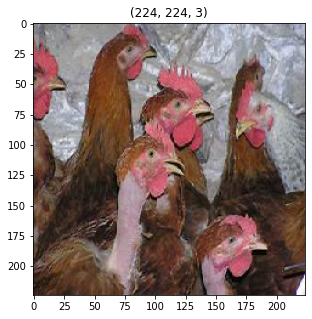

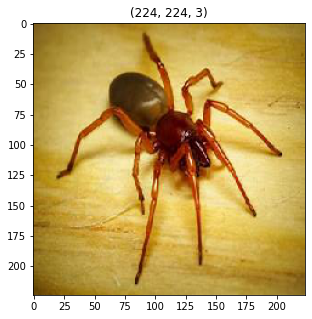

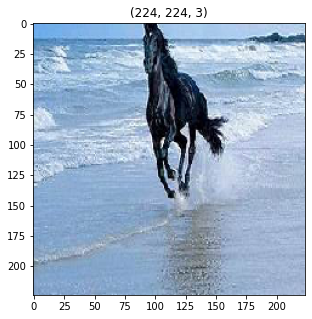

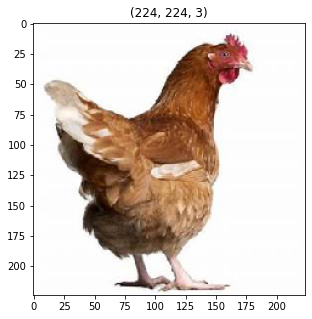

In [7]:
t_img, labels = train_datas.next()
v_img, labels = validation_datas.next()

def plotImages(imgList, labels):
  for index, image in enumerate(imgList):

    if index <= 10:

      plt.figure(figsize=(5,5))
      plt.imshow(image)
      plt.title(image.shape)
      plt.axis = False
      plt.show()

print("train")
plotImages(t_img, labels)
print("Validation")
plotImages(v_img, labels)

In [8]:
base_model = InceptionV3(input_shape=(224,224,3), include_top= False)

87924736/87910968 [==============================] - 1s 0us/step


In [9]:
for layer in base_model.layers:
  layer.trainable = False

In [10]:
from tensorflow.keras import applications
from tensorflow.keras import optimizers

model = applications.VGG16(weights='imagenet', include_top = False, input_shape=(224, 224, 3))

flat1 = tf.keras.layers.Flatten()(model.output)
dropout1 = Dropout(0.1)(flat1)
class1 = tf.keras.layers.Dense(256, activation='relu')(dropout1)
dropout2 = Dropout(0.1)(class1)
output = tf.keras.layers.Dense(10, activation='softmax')(dropout2)
model = Model(inputs = model.inputs, outputs = output)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers.SGD(lr=1e-3, momentum=0.9), metrics = ['accuracy'])
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


### Modeling 

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

model_checkpoint = ModelCheckpoint(filepath= "best_model.5h",
                                   monitor="val_loss",
                                   mode = 'min',
                                   save_best_only=True)
early_stopping = EarlyStopping (monitor= "val_loss",
                                min_delta = 0.0001,
                                patience = 5,
                                verbose = 1)

keras_callbacks = [model_checkpoint, early_stopping]


In [12]:
history = model.fit(train_datas,
                    validation_data = validation_datas,
                    steps_per_epoch= 10,
                    epochs=30,
                    validation_steps = 10,
                    callbacks = keras_callbacks)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
10/10 [==============================] - 33s 2s/step - loss: 2.4688 - accuracy: 0.2031 - val_loss: 2.2344 - val_accuracy: 0.1937
Epoch 2/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 15s 2s/step - loss: 2.2679 - accuracy: 0.1656 - val_loss: 2.1686 - val_accuracy: 0.2750
Epoch 3/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 15s 1s/step - loss: 2.1679 - accuracy: 0.2531 - val_loss: 2.1289 - val_accuracy: 0.2219
Epoch 4/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 17s 2s/step - loss: 2.1655 - accuracy: 0.2406 - val_loss: 2.0581 - val_accuracy: 0.2531
Epoch 5/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 15s 2s/step - loss: 1.9400 - accuracy: 0.3344 - val_loss: 1.6198 - val_accuracy: 0.4062
Epoch 6/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 15s 1s/step - loss: 1.7056 - accuracy: 0.4187 - val_loss: 1.4636 - val_accuracy: 0.4875
Epoch 7/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 15s 2s/step - loss: 1.6548 - accuracy: 0.4406 - val_loss: 1.1730 - val_accuracy: 0.6281
Epoch 8/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 12s 1s/step - loss: 1.5418 - accuracy: 0.4969 - val_loss: 1.3947 - val_accuracy: 0.5281
Epoch 9/30
10/10 [==============================] - 15s 2s/step - loss: 1.5569 - accuracy: 0.4625 - val_loss: 1.1050 - val_accuracy: 0.6281
Epoch 10/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 15s 2s/step - loss: 1.4219 - accuracy: 0.5375 - val_loss: 0.9539 - val_accuracy: 0.6812
Epoch 11/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 15s 1s/step - loss: 1.2708 - accuracy: 0.5219 - val_loss: 0.8214 - val_accuracy: 0.7312
Epoch 12/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 15s 2s/step - loss: 1.1830 - accuracy: 0.5750 - val_loss: 0.7653 - val_accuracy: 0.7281
Epoch 13/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 12s 1s/step - loss: 1.1400 - accuracy: 0.6250 - val_loss: 0.8287 - val_accuracy: 0.7031
Epoch 14/30
10/10 [==============================] - 15s 1s/step - loss: 1.0558 - accuracy: 0.6375 - val_loss: 0.6817 - val_accuracy: 0.7625
Epoch 15/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 12s 1s/step - loss: 1.0498 - accuracy: 0.6531 - val_loss: 0.7757 - val_accuracy: 0.7250
Epoch 16/30
10/10 [==============================] - 12s 1s/step - loss: 0.9626 - accuracy: 0.6781 - val_loss: 0.7335 - val_accuracy: 0.7375
Epoch 17/30
10/10 [==============================] - 15s 2s/step - loss: 0.9716 - accuracy: 0.6625 - val_loss: 0.6557 - val_accuracy: 0.7937
Epoch 18/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 15s 1s/step - loss: 0.9054 - accuracy: 0.7031 - val_loss: 0.5955 - val_accuracy: 0.8031
Epoch 19/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 12s 1s/step - loss: 0.8581 - accuracy: 0.7000 - val_loss: 0.7056 - val_accuracy: 0.7500
Epoch 20/30
10/10 [==============================] - 12s 1s/step - loss: 0.8681 - accuracy: 0.7094 - val_loss: 0.6433 - val_accuracy: 0.8156
Epoch 21/30
10/10 [==============================] - 12s 1s/step - loss: 0.8078 - accuracy: 0.7531 - val_loss: 0.8220 - val_accuracy: 0.7031
Epoch 22/30
10/10 [==============================] - 12s 1s/step - loss: 0.7716 - accuracy: 0.7406 - val_loss: 0.6868 - val_accuracy: 0.7844
Epoch 23/30
10/10 [==============================] - 15s 1s/step - loss: 0.7561 - accuracy: 0.7437 - val_loss: 0.5808 - val_accuracy: 0.7906
Epoch 24/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 12s 1s/step - loss: 0.7887 - accuracy: 0.7125 - val_loss: 0.6306 - val_accuracy: 0.7781
Epoch 25/30
10/10 [==============================] - 12s 1s/step - loss: 0.7912 - accuracy: 0.7281 - val_loss: 0.6206 - val_accuracy: 0.7937
Epoch 26/30
10/10 [==============================] - 15s 1s/step - loss: 0.6621 - accuracy: 0.7781 - val_loss: 0.5299 - val_accuracy: 0.8156
Epoch 27/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 15s 2s/step - loss: 0.6028 - accuracy: 0.7906 - val_loss: 0.4698 - val_accuracy: 0.8344
Epoch 28/30


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 12s 1s/step - loss: 0.6910 - accuracy: 0.7656 - val_loss: 0.5030 - val_accuracy: 0.8188
Epoch 29/30
10/10 [==============================] - 12s 1s/step - loss: 0.6129 - accuracy: 0.7937 - val_loss: 0.6164 - val_accuracy: 0.8281
Epoch 30/30
10/10 [==============================] - 12s 1s/step - loss: 0.8059 - accuracy: 0.7125 - val_loss: 0.5349 - val_accuracy: 0.8188


In [13]:
from keras.models import load_model

model = load_model("/content/best_model.5h")

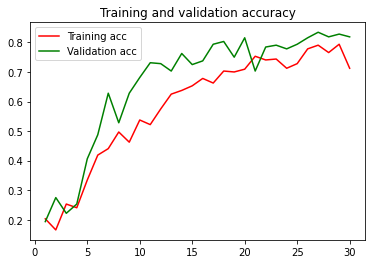

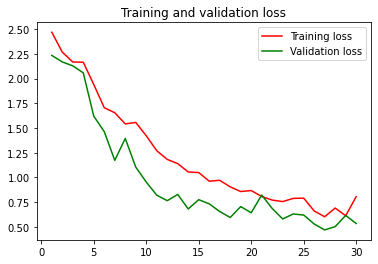

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'green', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()